# Problem Set 1 (110 points) 

## Important information
We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

Read [homework rules](https://nbviewer.jupyter.org/github/oseledets/nla2018/blob/master/hw.pdf) carefully. <font color='red'>If you do not follow it you will likely be penalized.</font>

# Problem 1 (Python demo) 40 pts

## Data preparation (10 pts)

* First of all download $\verb|.wav|$ file with starcraft sound from [here](https://github.com/oseledets/nla2018/tree/master/psets). Load it in python and play using the following functions:

In [1]:
from scipy.linalg import toeplitz
import numpy as np
import math
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib notebook

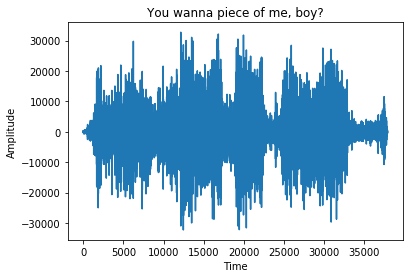

In [2]:
# reading
rate, audio = wav.read("TMaRdy00.wav")

# plotting
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
plt.show()

# playing
Audio(audio, rate=rate)

Our next goal is to process this signal by multiplying it by a special type of matrix (convolution operation) that will smooth the signal. 

* (5 pts) Before processing this file let us estimate what size of matrix we can afford. Let $N$ be the size of the signal. Estimate analytically memory in megabytes required to store dense square matrix of size $N\times N$ to fit in your operation memory and print this number. Cut the signal so that you will not have swap (overflow of the operation memory). **Note:** Cut the signal by taking every p-th number in array: ```signal[::p]```. 

In [3]:
N = len(audio)
print(N*N*8./(1024**2), 'Mbytes for matrix')
signal = np.array(audio[::3])
signal = signal.reshape(len(signal), 1)

10952.0 Mbytes for matrix


* (5 pts) Write a function 
```python
def gen_toeplitz(N, alpha):    
    return T
```
that outputs matrix $T$: $$T_{ij} = \sqrt{\frac{\alpha}{\pi}}e^{-\alpha (i-j)^2}, \quad i,j=1,\dots,N$$ as numpy array. <font color='red'> Avoid using loops or lists! </font> The function [np.meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) will be helpful for this task.
**Note:** matrices that depend only on difference of indices: $T_{ij} \equiv T_{i-j}$ are called **Toeplitz**. Toeplitz matrix-by-vector multiplication is **convolution** since it can be written as $$y_i = \sum_{j=1}^N T_{i-j} x_j.$$ Convolutions can be computed faster than $\mathcal{O}(N^2)$ complexity using Fast Fourier transform (will be covered later in our course, no need to implement it here).

In [4]:
# INPUT: N - integer (positive), alpha - float (positive)
# OUTPUT: T - np.array (shape: NxN)

def gen_toeplitz(N, alpha):
    # Your code is here
    xv, yv = np.meshgrid(np.arange(1, N+1), np.arange(1, N+1))
    T = math.sqrt(alpha/np.pi)*np.exp(-alpha*(xv-yv)**2)
    return T

## Convolution (10 pts)

* (5 pts) Write a function ```convolution``` (see below)
that takes the signal you want to convolve and multiply it by Toeplitz matrix T (for matvec operations use @ symbol). 

In [5]:
# INPUT: signal - np.array (shape: Nx1), N - int (positive), alpha - float (positive)
# OUTPUT: convolved_signal - np.array (shape: Nx1)

def convolution(signal, N, alpha):
    # Your code is here
    convolved_signal = gen_toeplitz(N, alpha)@signal
    return convolved_signal

* (3 pts) Plot the first $100$ points of the result and the first $100$ points of your signal on the same figure. Do the same plots for $\alpha = \frac{1}{5}$, $\alpha = \frac{1}{100}$ using ```plt.subplots``` in matplotlib. Each subplot should contain first $100$ points of initial and convolved signals for some $\alpha$. Make sure that you got results that look like smoothed initial signal.

* (2 pts) Play the resulting signal. In order to do so you should also scale the frequency (rate), which is one of the inputs in `Audio`.  
Note that you cannot play a signal which is too small.

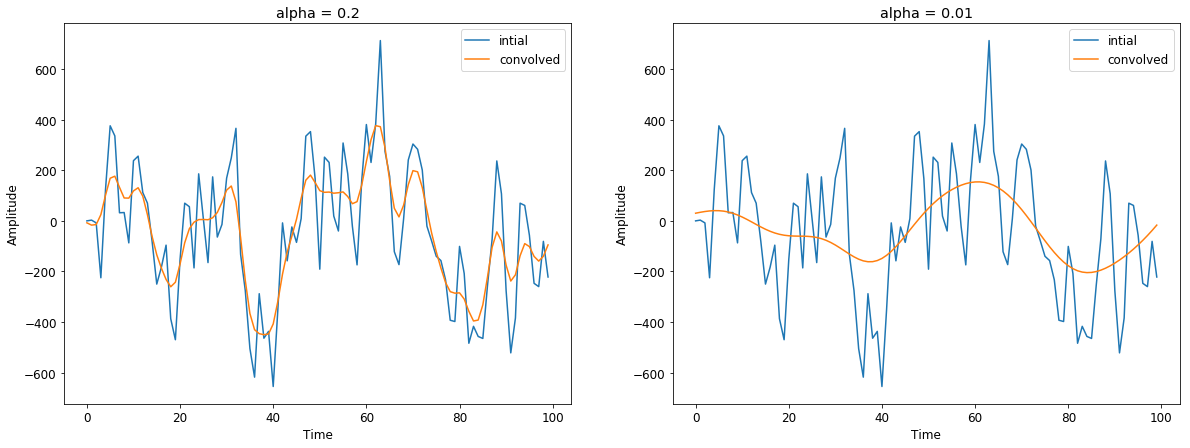

In [6]:
# Your code is here
signal_1 = convolution(signal, len(signal), 0.2)
signal_2 = convolution(signal, len(signal), 0.01)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(signal[:100])
plt.plot(signal_1[:100])
plt.ylabel("Amplitude");
plt.xlabel("Time");
plt.legend(('intial', 'convolved'));
plt.title("alpha = 0.2");
plt.subplot(1, 2, 2)
plt.plot(signal[:100])
plt.plot(signal_2[:100])
plt.ylabel("Amplitude");
plt.xlabel("Time");
plt.legend(('intial', 'convolved'));
plt.title("alpha = 0.01");

In [7]:
Audio(signal_1, rate=rate)

## Deconvolution (20 pts)

Given a convolved signal $y$ and an initial signal $x$ our goal now is to recover $x$ by solving the system
$$
    y = Tx.
$$
To do so we will run iterative process
$$
    x_{k+1} = x_{k} - \tau_k (Tx_k - y), \quad k=1,2,\dots
$$
starting from zero vector $x_0$. There are different ways how to define parameters $\tau_k$.
Different choices lead to different methods (e.g. Richardson iteration, Chebyshev iteration, etc.).
This topic will be covered in details later in our course.

To get some intuition why this process converges to the solution of $Tx=y$, we can consider the following. Let us note that if $x_k$ converges to some limit $x$, then so does $x_{k+1}$. Taking $k\to \infty$ we arrive at $x = x - \tau (Tx -  y)$ and hence $x$ is the solution of $Tx = y$. 

Another important point is that iterative process requires only matrix-vector porducts $Tx_k$ on each iteration instead of the whole matrix. In this problem we, however, work with the full matrix, but keep in mind, that convolution can be done efficiently without storing the whole matrix.

* (5 pts) For each $k$ choose paremeter $\tau_k$ such that the residual $r_{k+1}=Tx_{k+1} - y$ is minimal possible (*line search* with search direction $r_k$):
$$
    \|Tx_{k+1} - y\|_2 \to \min_{\tau_k}
$$
found analytically. The answer to this bullet is a derivation of $\tau_k$. The parameter $\tau_k$ should be expressed in terms of residuals $r_k = T x_k - y$.

# Your solution is here
$$
    r_{k+1} = Tx_{k+1} - y, \quad k=1,2,\dots
$$
$$
    x_{k+1} = x_k-\tau_k r_k
$$
$$
    r_{k+1} = Tx_k - \tau_k Tr_k - y = r_k - \tau_k Tr_k
$$
$$
    \|r_{k+1}\|^2_2 = (r_{k+1},r_{k+1}) =  \|r_k\|_2 - 2\tau_k (r_k, Tr_k) + \tau^2_k (Tr_k, Tr_k)
$$
$$
    \|r_{k+1}\|^2_2 >= 0,
$$
consequently let's take derivative with respect to $\tau_k$ and where it is equal to 0 there will be the point of norma minimum.
$$
    \frac{\partial \|r_{k+1}\|^2_2}{\partial \tau_k} = 2\tau_k \|Tr_k\|^2_2 - 2(r_k, Tr_k) = 0
$$
$$
    \tau_k = \frac{(r_k,Tr_k)}{\|Tr_k\|^2_2}
$$

* (10 pts) Write a function ```iterative```
that outputs accuracy –– a numpy array of relative errors $\big\{\frac{\|x_{k+1} - x\|_2}{\|x\|_2}\big\}$ after ```num_iter``` iterations using $\tau_k$ from the previous task. **Note:** The only loop you are allowed to use here is a loop for $k$.

In [8]:
# INPUT:  N - int (positive), alpha - float (positive), num_iter - integer (positive), 
#  y - np.array (shape: Nx1, convolved signal), s - np.array (shape: Nx1, original signal)
# OUTPUT: rel_error - np.array size (num_iter x 1)

def iterative(N, num_iter, y, s, alpha):
    # Your code is here
    rel_error = np.zeros((num_iter, 1))
    s_iter = np.zeros((N, 1))
    r = np.zeros((N, 1))
    Tr = np.zeros((N, 1))
    T = gen_toeplitz(N, alpha)
    for k in range (num_iter):
        r = T@s_iter-y
        Tr = T@r
        tau = np.dot(r.transpose(), Tr)/(np.linalg.norm(Tr, 2))**2
        s_iter = s_iter-tau*r
        rel_error[k] = (np.linalg.norm(s_iter-s, 2))/(np.linalg.norm(s, 2))
    return rel_error

* (2 pts) Set ```num_iter=1000```, ```x=s[::20]``` and do a convergence plot for $\alpha = \frac{1}{2}$ and $\alpha = \frac{1}{5}$.

In [156]:
# Your plots are here
x = signal[::20]
y1 = convolution(x, len(x), 0.5)
y2 = convolution(x, len(x), 0.2) 
relative_err_1 = iterative(len(x), 1000, y1, x, 0.5)
relative_err_2 = iterative(len(x), 1000, y2, x, 0.2)

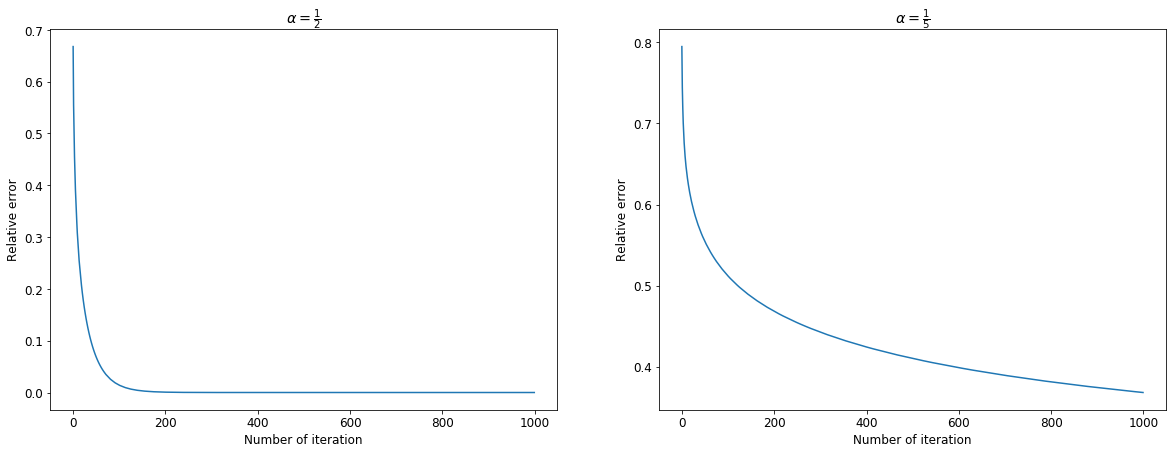

In [10]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(relative_err_1)
plt.xlabel('Number of iteration')
plt.ylabel('Relative error')
plt.title(r"$\alpha = \frac{1}{2}$");
plt.subplot(1,2,2)
plt.plot(relative_err_2)
plt.xlabel('Number of iteration')
plt.ylabel('Relative error')
plt.title(r"$\alpha = \frac{1}{5}$"); 

* (3 pts) Set ```x=s[::20]```, ```num_iter=1000``` and $\alpha=\frac{1}{5}$. Explain what happens with the convergence if you add small random noise of amplitude $10^{-3}\max(x)$  to $y$. The answer to this question should be an explanation supported by plots and/or tables.

### Our iterative process won't be converge to intial signal, because on every iteration $\tau_k$ increases the error because of wrong $y$ and $r_k$ value.

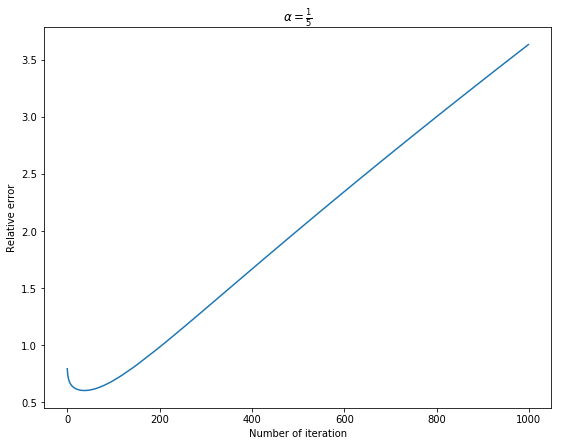

In [56]:
# Your code is here
y_noise = y2+max(x)*np.random.randn(len(x), 1)/1000
relative_err_noise = iterative(len(x), 1000, y_noise, x, 0.2)
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(relative_err_noise)
plt.xlabel('Number of iteration')
plt.ylabel('Relative error')
plt.title(r"$\alpha = \frac{1}{5}$");

# Problem 2 (Theoretical tasks)  45 pts

_1._
- (5 pts) Prove that $\| U A \|_F = \| A U \|_F = \| A \|_F$ for any unitary matrix $U$.
- (5 pts) Prove that $\| Ux \|_2 = \| x \|_2$ for any $x$ iff $U$ is unitary.
- (5 pts) Prove that $\| U A \|_2 = \| A U \|_2 = \| A \|_2$ for any unitary $U$. 
  
_2._
- (5 pts) Using the results from the previous subproblem, prove that $\| A \|_F \le \sqrt{\mathrm{rank}(A)} \| A \|_2$. _Hint:_ SVD will help you.
- (5 pts) Show that for any $m, n$ and $k \le \min(m, n)$ there exists $A \in \mathbb{R}^{m \times n}: \mathrm{rank}(A) = k$, such that $\| A \|_F = \sqrt{\mathrm{rank}(A)} \| A \|_2$. In other words, show that the previous inequality is not strict.
- (5 pts) Prove that if $\mathrm{rank}(A) = 1$, then $\| A \|_F  = \| A \|_2$.
- (5 pts) Prove that $\| A B \|_F \le \| A \|_2 \| B \|_F$.

_3._    
* (3 pts) Differentiate with respect to $A$ the function
$$
f(A) = \mathrm{sin}(x^\top A B C D x),
$$
where $x$ is a vector and $A, B, C, D$ are square matrices.

* (7 pts) Differentiate with respect to $y, A, X$ the function
$$f(y, A, X) = \mathrm{tr}(\mathrm{diag}(y) A X),$$
where $y \in \mathbb{R}^n$ and $A, X \in \mathbb{R}^{n \times n}$. Here 

$$
\mathrm{diag}(y)_{i, j} = 
    \begin{cases}
      y_i, & \text{if}\ i = j \\
      0, & \text{otherwise}
    \end{cases}
$$

# Your solution is here
_1._
- $$\| U A \|^2_F =  \mathrm{tr}((U A)^* U A) =  \mathrm{tr} (A^* U^* U A) = \mathrm{tr}(A^* A) = \|A \|^2_F$$ 
  $$\|A U\|^2_F = \mathrm{tr}((A U)^* A U) = \mathrm{tr}(U^* A^* A U) = \mathrm{tr}(U U^* A^* A) = \mathrm{tr}(A^* A) = \|A \|^2_F$$
$$
$$
- $$\| x \|^2_2 = (x, x) = (x, U^*Ux) = ((U^*)^*x, Ux) = (Ux, Ux) = \|U x \|^2_2  $$
$$
$$
- $$ \|A\|^2_2 = \lambda_\max(A^*A) $$
  $$ \|UA\|^2_2 = \lambda_\max(A^*U^*UA) = \lambda_\max(A^*A)$$
  $$\|AUx \|^2_2 = (AUx,AUx) = (A*Ax, U^*Ux) = (A^*Ax, x) = (Ax, Ax) = \|A x \|^2_2  $$
  $$ Consequently\: \|AU \|^2_2=\|A \|^2_2 =  \|UA \|^2_2$$
  
_2._
- $$ \| A \|^2_F = \mathrm{tr}(A^*A) = \mathrm{tr}((USV)^*(USV)) = \mathrm{tr}((V^*S^*U^*USV) = \mathrm{tr}((VV^*S^*S) = \mathrm{tr}(S^*S) \le \mathrm{rank}(S)\lambda_\max(S^*S) = \mathrm{rank}(A)\lambda_\max(A^*A) = \mathrm{rank(A)} \| A \|^2_2$$
$A = USV$ - singular value decomposition of A. U, V - unitary. S - diagonal. $\mathrm{rank}(A) = \mathrm{rank}(S)$
$$  \| A \|_F \le \sqrt{\mathrm{rank}(A)}  \| A \|_2$$
$$
$$
- $$ Let\: consider \: matrix \: A = E_k, so\: that A = diag(1\,1\,\dots\,1\, 0\, 0\, \dots 0)\: k-ones\: and\: other\: elements\: are\: 0$$
$$ Then\: \| A \|_F = \sqrt{n},\: \mathrm{rank}(A)=n \:and\: \| A \|_2 = 1$$
$$
$$
- $$ \mathrm{rank}(A) = 1,\: A=USV \:, S = diag(\sigma\, 0\dots \, 0) \, has \, only\, one\, non-zero\, singular \, value\,, U,V \,are\,unitary$$ $$ then \, \| A \|_F = \sigma \,and\,  \| A \|_2 =\sqrt{\lambda_\max(A^*A)}= \sigma $$
$$
$$
- $$\| A B \|_F \le \mathrm{rank}(AB) \| A \|_2 \| B \|_2 \le \mathrm{rank}(B)\| A \|_2 \| B \|_2 \le \| A \|_2 \| B \|_F$$
$$ Let \: \mathrm{rank}(AB) \le \mathrm{rank}(A)\le \mathrm{rank}(B)$$
$$ \| B \|_F\le \mathrm{rank}(B)\| B \|_2 $$

_3._
- $$ \frac{\partial f}{\partial A} = \mathrm{cos}(x^\top A B C D x)  \frac{\partial(x^\top A (B C D x)) }{\partial A} = \mathrm{cos}(x^\top A B C D x) x(BCDx)^\top = \mathrm{cos}(x^\top A B C D x) xx^\top D^\top C^\top B^\top $$
$$
$$
- $$ \frac{\partial \mathrm{tr}(\mathrm{diag}(y) A X)}{\partial A} =  \frac{\partial \mathrm{tr}(X \mathrm{diag}(y) A)}{\partial A} = (X \mathrm{diag}(y))^\top = \mathrm{diag}(y) X^\top$$
$$
$$
 $$ \frac{\partial \mathrm{tr}(\mathrm{diag}(y) A X)}{\partial X} =   = (\mathrm{diag}(y) A)^\top = A^\top\mathrm{diag}(y) $$
$$
$$
 $$ \frac{\partial \mathrm{tr}(\mathrm{diag}(y) A X)}{\partial \mathrm{diag}(y)} = \frac{\partial \mathrm{tr}(A X (\mathrm{diag}(y))^\top)}{\partial \mathrm{diag}(y)} = A X $$
$$
$$
 $$ \frac{\partial \mathrm{tr}(\mathrm{diag}(y) A X)}{\partial y} = \frac{\partial (\sum\limits_{i=1}^n y_i  \sum\limits_{k=1}^n A_{ik} X_{ki})}{\partial y} = [\sum\limits_{k=1}^n A_{1k} X_{k1}, \: \sum\limits_{k=1}^n A_{2k} X_{k2},\dots \sum\limits_{k=1}^n A_{nk} X_{kn}] - diagonal\, elements\, of\, matrix\, AX . $$

# Problem 3 (Strassen algorithm) 15 pts

_1._ (3 pts) Implement the naive algorithm for squared matrix multiplication with explicit “for” cycles.

In [141]:
def naive_multiplication(A, B):
    """
    Implement naive matrix multiplication with explicit for cycles
    
    Parameters: Matrices A, B
    
    Returns: Matrix C = AB
    """
#     Your code is here
    m = A.shape[0]
    C = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            for s in range(m):
                C[i,j] += A[i,s]*B[s, j]
    return C

_2._ (7 pts) Implement the Strassen algorithm.

In [130]:
def splited(A):
    N = len(A[0])
    N_2 = N // 2
    A11 = A[0:N_2, 0:N_2]
    A12 = A[0:N_2, N_2:N]
    A21 = A[N_2:N, 0:N_2]
    A22 = A[N_2:N, N_2:N]
    
    return A11, A12, A21, A22

In [131]:
def order_round(A):
    n = math.ceil(np.log2(max(A.shape)))
    N = 2**n
    A_great = np.zeros((N,N))
    A_great[:A.shape[0], :A.shape[1]] = A
    return A_great

In [132]:
def strassen(A, B):
    """
    Implement Strassen algorithm for matrix multiplication 
    
    Parameters: Matrices A, B
    
    Returns: Matrix C = AB
    """
    
    A = order_round(A)
    B = order_round(B)
    
    if (len(A[0]) == 2):
        return np.array([[A[0,0] * B[0,0] + A[0,1] * B[1,0], A[0,0] * B[0,1] + A[0,1] * B[1,1]],
                         [A[1,0] * B[0,0] + A[1,1] * B[1,0], A[1,0] * B[0,1] + A[1,1] * B[1,1]]])

    A11, A12, A21, A22 = splited(A)
    B11, B12, B21, B22 = splited(B)
        
    f1 = strassen(A11+A22, B11+B22)
    f2 = strassen(A21+A22, B11)
    f3 = strassen(A11, B12-B22)    
    f4 = strassen(A22, B21-B11)
    f5 = strassen(A11+A12, B22)   
    f6 = strassen(A21-A11, B11+B12)
    f7 = strassen(A12-A22, B21+B22)

    C11 = f1+f4-f5+f7
    C12 = f3+f5
    C21 = f2+f4
    C22 = f1-f2+f3+f6

    C = np.vstack((np.hstack((C11,C12)),np.hstack((C21,C22))))
    
    return C

_3._ (5 pts) Compare three approaches: naive multiplication, Strassen algorithm and standard NumPy function. 
Provide a plot in log-scale of dependence between the matrix size and the runtime of multiplication. You will have three lines, do not forget to add legend, axis labels and other attributes (see our [requirements](https://nbviewer.jupyter.org/github/oseledets/nla2018/blob/master/hw.pdf))  
Consider the matrix size in the range of 100 to 700 with step 100, e.g. $n=100, 200,\ldots, 700$. 
Justify the results theoretically (e.g., use the known formulas for total multiplication complexity of naive and Strassen algorithms).

In [151]:
# Your code is here
from time import time
N_set = range(100, 401, 100)
Time = np.zeros((4,3))
i = 0
for N in N_set:
    X = np.random.randn(N,N)
    Y = np.random.randn(N,N)
    start = time()
    np.dot(X,Y)
    Time[i,0] = time() - start
    start = time()
    naive_multiplication(X, Y)
    Time[i,1] = time() - start
    start = time()
    strassen(X, Y)
    Time[i,2] = time() - start 
    i+=1

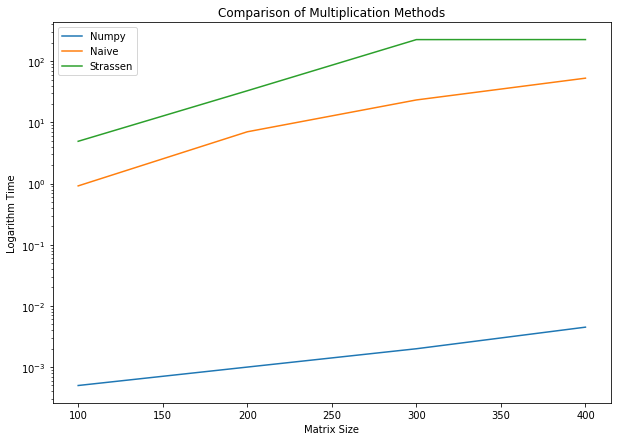

In [155]:
time_
plt.figure(figsize=(10, 7))
plt.semilogy(N_set, Time[:,0])
plt.semilogy(N_set, Time[:,1])
plt.semilogy(N_set, Time[:,2])
plt.xlabel('Matrix Size')
plt.ylabel('Logarithm Time')
plt.title('Comparison of Multiplication Methods')
plt.legend(('Numpy', 'Naive', 'Strassen'))
plt.show()
#for other value of N I didn't have time

The complexity of a na&iuml;ve algorithm is  $\mathcal{O}(n^3)$. Strassen gives $\mathcal{O}(n^{2.807\dots})$. But for $n<667$ naive algorithm works better than Strassen. Also, angle of slope for naive and Starssen is approximately  similar in logarithmic scale as expected from complexity formulas. 

# Problem 4 (SVD) 10 pts
In this assignment you are supposed to study how SVD could be used in image compression.

_1._ (2 pts) Compute the singular values of some predownloaded image (via the code provided below) and plot them. Do not forget to use logarithmic scale.

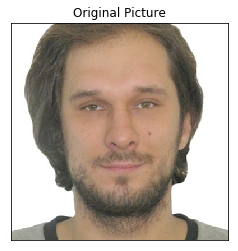

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np


url = 'https://pbs.twimg.com/profile_images/1658625695/my_photo_400x400.jpg'  # Ivan
#url = 'https://i.chzbgr.com/full/5536320768/h88BAB406/' # Insight
# url = '' # your favorite picture, please!

face_raw = Image.open(requests.get(url, stream=True).raw)
face = np.array(face_raw).astype(np.uint8)

plt.imshow(face)
plt.xticks(())
plt.yticks(())
plt.title('Original Picture')
plt.show()

Text(0.5,0,'Singular value index, $i$')

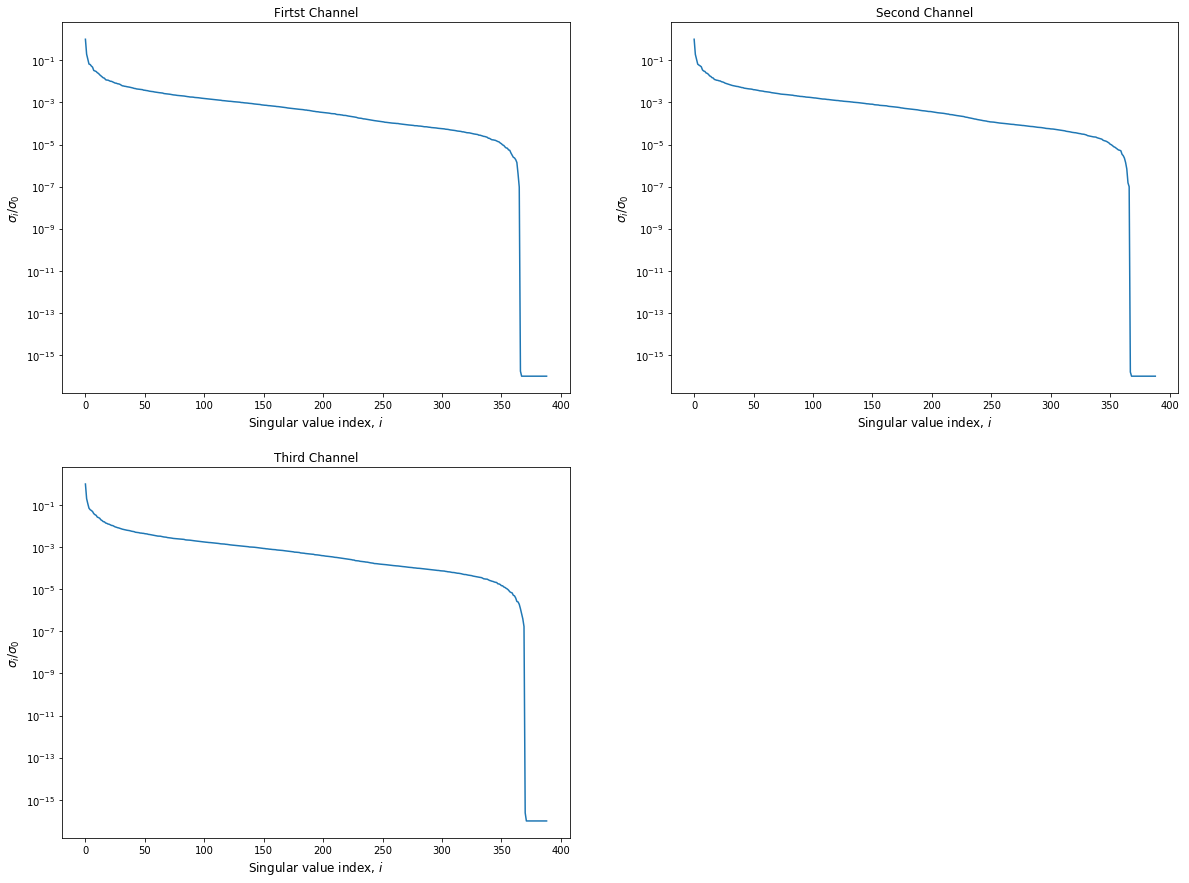

In [13]:
# Your code is here
u0, s0, v0 = np.linalg.svd(face[:,:,0])
u1, s1, v1 = np.linalg.svd(face[:,:,1])
u2, s2, v2 = np.linalg.svd(face[:,:,2])
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
plt.semilogy(s0/s0[0])
plt.title('Firtst Channel')
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=12)
plt.xlabel(r"Singular value index, $i$", fontsize=12)
plt.subplot(2,2,2)
plt.semilogy(s1/s1[0])
plt.title('Second Channel')
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=12)
plt.xlabel(r"Singular value index, $i$", fontsize=12)
plt.subplot(2,2,3)
plt.semilogy(s2/s2[0])
plt.title('Third Channel')
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=12)
plt.xlabel(r"Singular value index, $i$", fontsize=12)

_2._ (3 pts) Complete a function ```compress```, that performs SVD and truncates it (using $k$ singular values/vectors). See the prototype below. 

Note, that in colourful case you have to split your image to channels and work with matrices corresponding to different channels separately.

Plot approximate reconstructed image $M_\varepsilon$ of your favorite image such that $rank(M_\varepsilon) = 5, 20, 50$ using ```plt.subplots```.

In [14]:
def compress(image, k):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)
    
    Parameters: 
        image (np.array):        input image (probably, colourful)
        
        k (int):                 approximation rank
        
    --------
    Returns:
      reconst_matrix (np.array): reconstructed matrix (tensor in colourful case)
      
      s (np.array):              array of singular values 
    """
#     Your code is here
    reconst_matrix = np.zeros(image.shape)
    s = np.zeros((k, image.shape[2]))
    for i in range (3):    
        u, S, v = np.linalg.svd(image[:,:,i])
        u = u[:, :k]
        s[:, i] = S[:k]
        v = v[:k, :]
        reconst_matrix[:, :, i] = u.dot(np.diag(s[:, i]).dot(v))
    return np.array(reconst_matrix).astype(np.uint8), np.array(s)

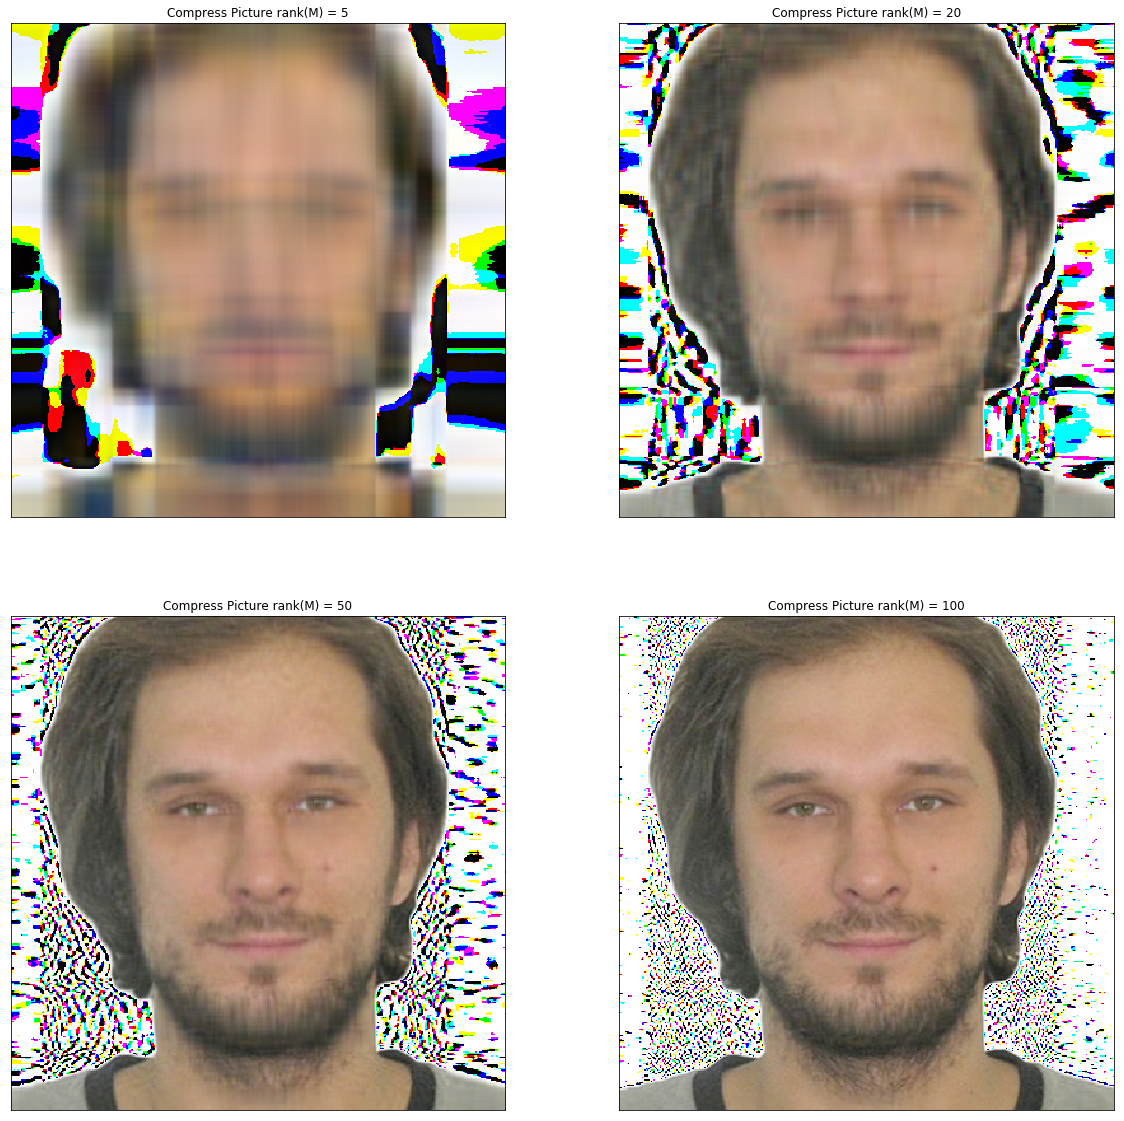

In [32]:
# Your code is here
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
face_compress1, S1 = compress(face, 5)
plt.imshow(face_compress1)
plt.xticks(())
plt.yticks(())
plt.title('Compress Picture rank(M) = 5');

plt.subplot(2, 2, 2)
face_compress2, S2 = compress(face, 20)
plt.imshow(face_compress2)
plt.xticks(())
plt.yticks(())
plt.title('Compress Picture rank(M) = 20');


plt.subplot(2, 2, 3)
face_compress3, S3 = compress(face, 50)
plt.imshow(face_compress3)
plt.xticks(())
plt.yticks(())
plt.title('Compress Picture rank(M) = 50');


plt.subplot(2, 2, 4)
face_compress4, S4 = compress(face, 100)
plt.imshow(face_compress4)
plt.xticks(())
plt.yticks(())
plt.title('Compress Picture rank(M) = 100');

_3._ (3 pts) Plot the following two figures for your favorite picture
* How relative error of approximation depends on the rank of approximation?
* How compression rate in terms of storing information ((singular vectors + singular numbers) / total size of image) depends on the rank of approximation?

In [49]:
def compress_and_size(image, k):
    reconst_matrix = np.zeros(image.shape)
    u = np.zeros((image.shape[0], k,image.shape[2]))
    v = np.zeros((k, image.shape[1],image.shape[2]))
    s = np.zeros((k, image.shape[2]))
    for i in range (3):    
        U, S, V = np.linalg.svd(image[:,:,i])
        u[:,:, i] = U[:, :k]
        s[:, i] = S[:k]
        v[:, :, i] = V[:k, :]
        reconst_matrix[:, :, i] = u[:,:,i].dot(np.diag(s[:, i]).dot(v[:,:,i]))
    return np.array(reconst_matrix).astype(np.uint8), u.__sizeof__(),  s.__sizeof__(),  v.__sizeof__()

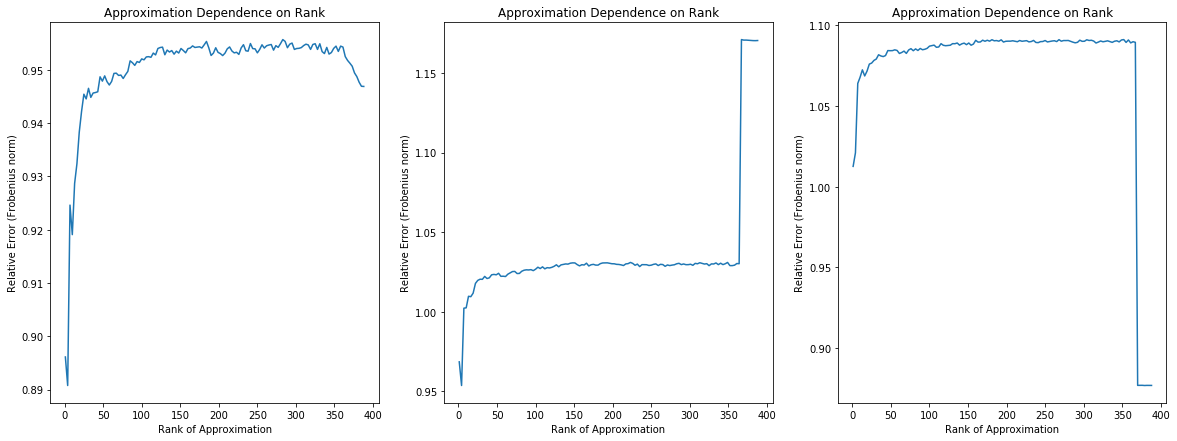

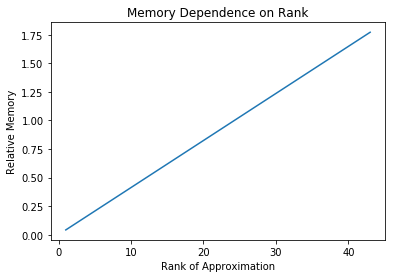

In [55]:
# Your code is here
rank = range(1, 389, 3)
appr_error0 = np.zeros((len(rank), 1))
appr_error1 = np.zeros((len(rank), 1))
appr_error2 = np.zeros((len(rank), 1))
storing = np.zeros((len(rank), 1))
i = 0
rank = range(1, 389, 3)
for k in rank:
    face_compress, store_u, store_s, store_v = compress_and_size(face, k)
    storing[i] = (store_u+store_s+store_v)/(face.__sizeof__())
    appr_error0[i] = np.linalg.norm(face_compress[:,:,0] - face[:,:,0], 'fro')/ np.linalg.norm(face[:, :, 0], 'fro')
    appr_error1[i] = np.linalg.norm(face_compress[:,:,1] - face[:,:,1], 'fro')/ np.linalg.norm(face[:, :, 1], 'fro')
    appr_error2[i] = np.linalg.norm(face_compress[:,:,2] - face[:,:,2], 'fro')/ np.linalg.norm(face[:, :, 2], 'fro')
    i+=1
plt.figure(figsize = (20, 7))
plt.subplot(1,3,1)
plt.plot(rank, appr_error0)
plt.title('Approximation Dependence on Rank')
plt.xlabel('Rank of Approximation');
plt.ylabel('Relative Error (Frobenius norm)');

plt.subplot(1,3,2)
plt.plot(rank, appr_error1)
plt.title('Approximation Dependence on Rank')
plt.xlabel('Rank of Approximation');
plt.ylabel('Relative Error (Frobenius norm)');

plt.subplot(1,3,3)
plt.plot(rank, appr_error2)
plt.title('Approximation Dependence on Rank')
plt.xlabel('Rank of Approximation');
plt.ylabel('Relative Error (Frobenius norm)');

plt.figure()
plt.plot(rank[0:15], storing[0:15])
plt.title('Memory Dependence on Rank')
plt.xlabel('Rank of Approximation');
plt.ylabel('Relative Memory');

_4._ (2 pts) Consider the following two pictures. Compute their approximations (with the same rank, or relative error). What do you see? Explain results.

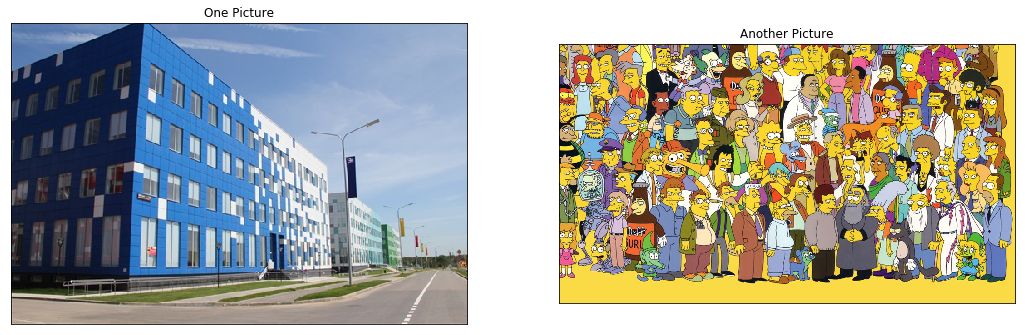

In [17]:
url1 = 'http://sk.ru/resized-image.ashx/__size/550x0/__key/communityserver-blogs-components-weblogfiles/00-00-00-60-11/skoltech1.jpg'
url2 = 'http://www.simpsoncrazy.com/content/characters/poster/bottom-right.jpg'
image_raw1 = Image.open(requests.get(url1, stream=True).raw)
image_raw2 = Image.open(requests.get(url2, stream=True).raw)

image1 = np.array(image_raw1).astype(np.uint8)
image2 = np.array(image_raw2).astype(np.uint8)

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.imshow(image_raw1)
plt.title('One Picture')
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(image_raw2)
plt.title('Another Picture')
plt.xticks(())
plt.yticks(())

plt.show()

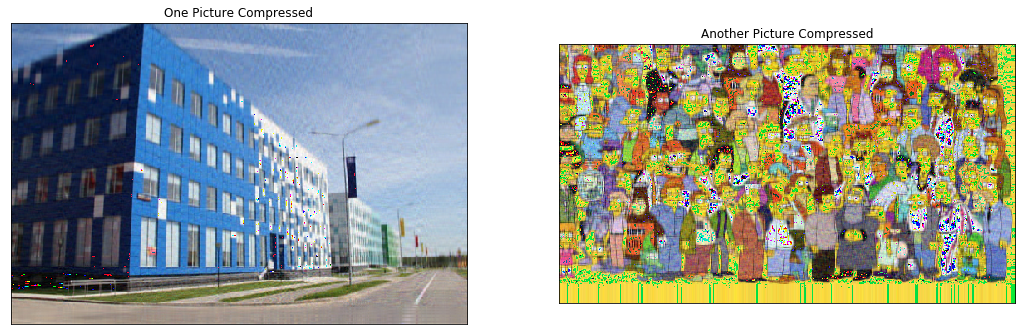

In [152]:
# Your code is here
image_compress1, S_1 = compress(image1, 50)
image_compress2, S_2 = compress(image2, 50)

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.imshow(image_compress1)
plt.title('One Picture Compressed')
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(image_compress2)
plt.title('Another Picture Compressed')
plt.xticks(())
plt.yticks(())

plt.show()

### The colors are smoothed. Because I decreased the number of singular value and vectors, it is impossible to distinguish rapidly changing colours and any colors are replaced by other colors. In my opinion there is interpolation of colors.

# Problem 5 (Bonus)

1. The norm is called absolute if $\|x\|=\| \lvert x \lvert \|$ holds for any vector $x$, where $x=(x_1,\dots,x_n)^T$ and $\lvert x \lvert = (\lvert x_1 \lvert,\dots, \lvert x_n \lvert)^T$. Give an example of a norm which is not absolute.

2. Write a function ```ranks_HOSVD(A, eps)```
that calculates Tucker ranks of a d-dimensional tensor $A$ using High-Order SVD (HOSVD) algorithm, where ```eps``` is the relative accuracy in the Frobenius norm between the approximated and the initial tensors. Details can be found [here](http://ca.sandia.gov/~tgkolda/pubs/pubfiles/TensorReview.pdf) on Figure 4.3.
```python
def ranks_HOSVD(A, eps):
      return r #r should be a tuple of ranks r = (r1, r2, ..., rd)
```

## The not absolute norms is provided by the intergrals, for example $L_1$ and $L_2$ norms.